In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 2s 1us/step


In [2]:
len(train_data)

8982

In [3]:
reuters[0]

TypeError: 'module' object is not subscriptable

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [6]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [8]:

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.0939 - accuracy: 0.9582 - val_loss: 1.2525 - val_accuracy: 0.8070
Epoch 2/20
7982/7982 [==============================] - 1s 110us/step - loss: 0.0960 - accuracy: 0.9573 - val_loss: 1.2245 - val_accuracy: 0.7920
Epoch 3/20
7982/7982 [==============================] - 1s 105us/step - loss: 0.0971 - accuracy: 0.9579 - val_loss: 1.2745 - val_accuracy: 0.7910
Epoch 4/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.0930 - accuracy: 0.9605 - val_loss: 1.3168 - val_accuracy: 0.7960
Epoch 5/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.0910 - accuracy: 0.9585 - val_loss: 1.2821 - val_accuracy: 0.7940
Epoch 6/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.0888 - accuracy: 0.9595 - val_loss: 1.3840 - val_accuracy: 0.7790
Epoch 7/20
7982/7982 [==============================] - 1s 107us/step - loss

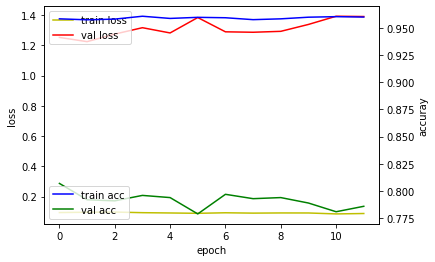

In [13]:
from keras.callbacks import EarlyStopping 
import matplotlib.pyplot as plt
early_stopping= EarlyStopping(monitor = 'val_loss',min_delta = 0, patience = 10, verbose = 0, mode = 'min')
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val), callbacks = [early_stopping])
results = model.evaluate(x_test, one_hot_test_labels)

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()


loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')


acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')


loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')


plt.show()

In [14]:
results

[1.6268707485148022, 0.7698130011558533]

In [15]:
predictions = model.predict(x_test)

In [16]:
predictions[0].shape

(46,)

In [17]:
predictions

array([[5.2967170e-08, 4.8180132e-06, 2.0948860e-09, ..., 8.7980578e-13,
        3.4355382e-17, 2.1350338e-14],
       [1.0231477e-03, 4.0657726e-01, 3.9056098e-04, ..., 8.6769845e-12,
        5.3411296e-11, 1.1275456e-05],
       [1.4695228e-04, 9.9448276e-01, 5.9628430e-05, ..., 2.5750551e-06,
        6.4394719e-11, 3.6337255e-07],
       ...,
       [8.8515675e-09, 3.0434063e-05, 7.5338811e-09, ..., 8.2938233e-11,
        1.8650291e-13, 9.7318421e-13],
       [1.7315581e-03, 4.4191459e-01, 1.2210602e-04, ..., 8.0610425e-06,
        4.6643249e-09, 9.8664086e-06],
       [5.4107392e-07, 9.9536407e-01, 1.6732998e-04, ..., 3.5686092e-08,
        5.3303287e-13, 3.0847578e-09]], dtype=float32)

In [18]:
np.argmax(predictions[0])

3

In [19]:
np.argmax(predictions[])

1

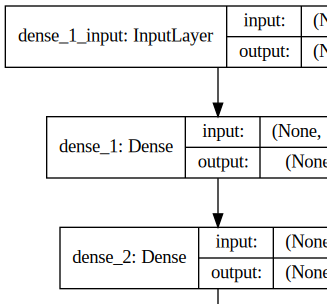

In [24]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))